In [1]:
install.packages("caTools")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [2]:
library(caTools)

In [3]:
install.packages("tidyverse")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("caTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 5000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Address
dbl (6): Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, A...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
79545.46,5.682861,7.009188,4.09,23086.80,1059033.6,"208 Michael Ferry Apt. 674 Laurabury, NE 37010-5101"
79248.64,6.002900,6.730821,3.09,40173.07,1505890.9,"188 Johnson Views Suite 079 Lake Kathleen, CA 48958"
61287.07,5.865890,8.512727,5.13,36882.16,1058988.0,"9127 Elizabeth Stravenue Danieltown, WI 06482-3489"
63345.24,7.188236,5.586729,3.26,34310.24,1260616.8,USS Barnett FPO AP 44820
59982.20,5.040555,7.839388,4.23,26354.11,630943.5,USNS Raymond FPO AE 09386
80175.75,4.988408,6.104512,4.04,26748.43,1068138.1,"06039 Jennifer Islands Apt. 443 Tracyport, KS 16077"


`geom_smooth()` using formula = 'y ~ x'


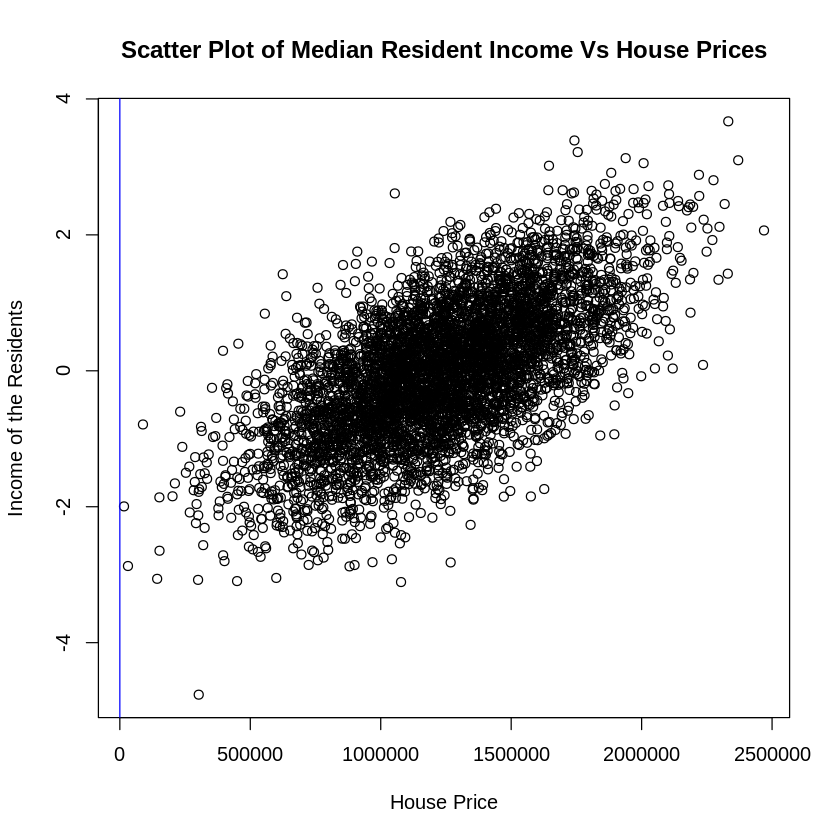

`geom_smooth()` using formula = 'y ~ x'


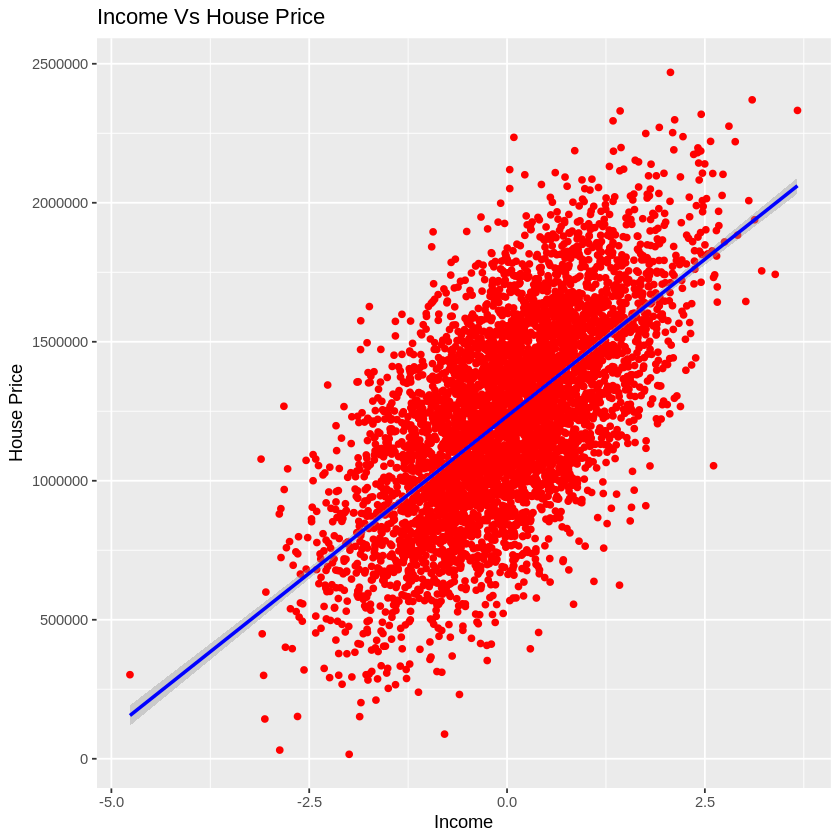

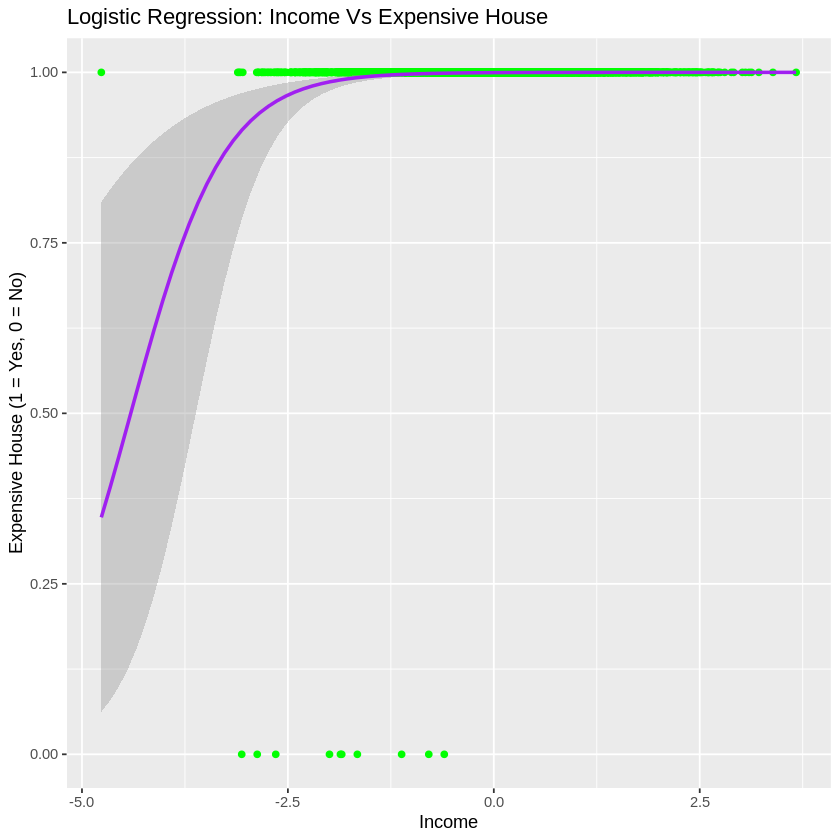

In [5]:
# Load required libraries
library(tidyverse)
library(caTools)

# Load the dataset
housing = read_csv("housing.csv")

# View the first few rows
head(housing)

# Create new variables based on the dataset's columns
housing$mean_bedrooms = housing$`Avg. Area Number of Bedrooms` / housing$`Area Population`
housing$mean_rooms = housing$`Avg. Area Number of Rooms` / housing$`Area Population`

# Prepare data for the logistic regression and linear regression analysis
# Normalize the numeric features
drops = c('Address', 'Price')  # Columns to drop
housing_num = housing[, !(names(housing) %in% drops)]
scaled_housing_num = scale(housing_num)

# Recombine cleaned dataset
cleaned_housing = cbind(scaled_housing_num, Price = housing$Price)
cleaned_housing = as.data.frame(cleaned_housing)  # Ensure it is a dataframe

# Linear Regression Plot
plot(cleaned_housing$Price, cleaned_housing$`Avg. Area Income`,
     xlab = "House Price",
     ylab = "Income of the Residents",
     main = "Scatter Plot of Median Resident Income Vs House Prices")

# Fit linear model
lm_model <- lm(Price ~ `Avg. Area Income`, data = cleaned_housing)

# Add the regression line to the plot
abline(lm_model, col = "blue")

# Plot using ggplot for better visualization
ggplot(cleaned_housing, aes(x = `Avg. Area Income`, y = Price)) +
  geom_point(colour = 'red') +
  geom_smooth(method = 'lm', colour = 'blue') +
  ggtitle('Income Vs House Price') +
  xlab('Income') +
  ylab('House Price')

# Prepare data for logistic regression
# Define the expensive category (price greater than 250,000)
cleaned_housing$expensive = ifelse(cleaned_housing$Price > 250000, 1, 0)

# Logistic regression model
logistic_model <- glm(expensive ~ `Avg. Area Income`, data = cleaned_housing, family = "binomial")

# Plot logistic regression results
ggplot(cleaned_housing, aes(x = `Avg. Area Income`, y = expensive)) +
  geom_point(colour = 'green') +
  geom_smooth(method = 'glm', method.args = list(family = "binomial"), colour = 'purple') +
  ggtitle('Logistic Regression: Income Vs Expensive House') +
  xlab('Income') +
  ylab('Expensive House (1 = Yes, 0 = No)')
